# Customer Churn Prediction using ML Algorithms

In [82]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [83]:
#import the dataset

df = pd.read_csv("Telco Customer Churn\Telco Customer Churn.csv")

# Data Description

In [84]:
#size of the dataset
df.shape

(7043, 21)

In [85]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [86]:
#attribute names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [87]:
#to get to know about the datatype of every columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
#getting some statistics insights
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [89]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Exploratory Data Analysis

In [90]:
#attributes having exactly 2 classes


col = df.columns
cols_binary_class = []

for index in col:
    if df[index].value_counts().shape[0] == 2:
        cols_binary_class.append(index)
print(cols_binary_class)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [91]:
#attributes having more than 2 classes

mul_class = []
all_cols = df.columns
for i in all_cols:
        if(i not in cols_binary_class):
            mul_class.append(i)
print(mul_class)

['customerID', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

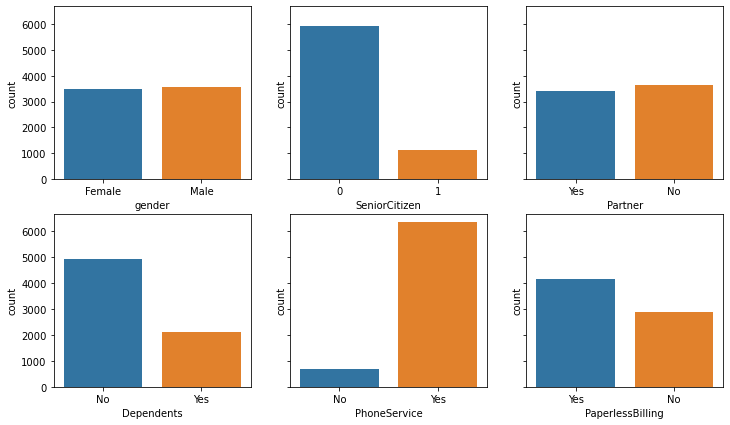

In [92]:
#checking the binary features

import warnings 
warnings.filterwarnings("ignore")

figs, position = plt.subplots(2,3, figsize=(12,7), sharey = True)

sns.countplot("gender", data=df, ax = position[0,0])
sns.countplot("SeniorCitizen", data=df, ax = position[0,1])
sns.countplot("Partner", data=df, ax = position[0,2])
sns.countplot("Dependents", data=df, ax = position[1,0])
sns.countplot("PhoneService", data=df, ax = position[1,1])
sns.countplot("PaperlessBilling", data=df, ax = position[1,2])


In [93]:
#label encoding for "Churn" as it has categorical values"
churn_simple = {'Yes': 1, 'No': 0}
df.Churn.replace(churn_simple, inplace=True)

<AxesSubplot:xlabel='Churn', ylabel='count'>

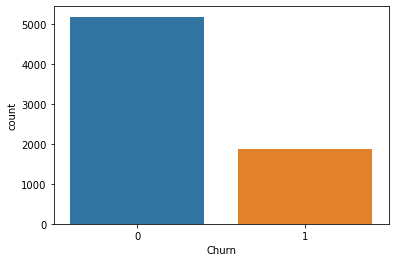

In [94]:
sns.countplot("Churn", data=df)

In [95]:
for i in cols_binary_class[0:5]:
    print(df[[i,'Churn']].groupby(i).mean())
    

           Churn
gender          
Female  0.269209
Male    0.261603
                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
No       0.329580
Yes      0.196649
               Churn
Dependents          
No          0.312791
Yes         0.154502
                 Churn
PhoneService          
No            0.249267
Yes           0.267096


<AxesSubplot:xlabel='InternetService', ylabel='count'>

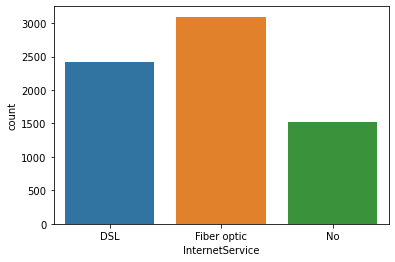

In [96]:
sns.countplot("InternetService", data=df)

In [97]:
#playing with other multiple featured class labels
internet_related = mul_class[4:10]
for i in internet_related:
    print(df[[i,'Churn']].groupby(i).mean())
    

                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663
                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414


In [98]:
df[["InternetService","MonthlyCharges"]].groupby("InternetService").mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

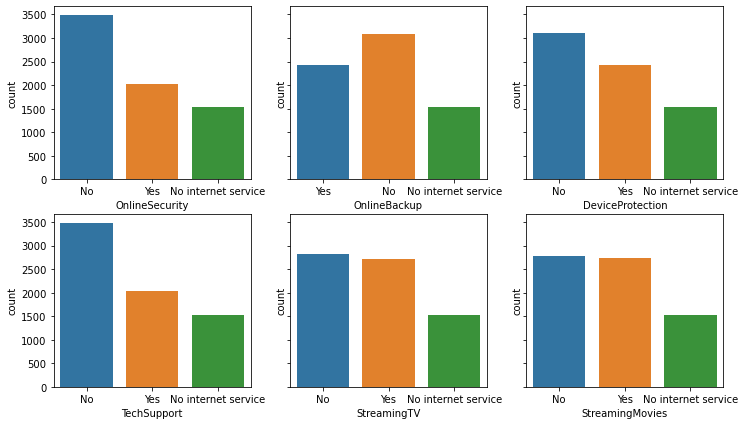

In [99]:
#Checking the distribution in Internet related attributes

fig, position = plt.subplots(2,3, figsize = (12,7), sharey = True)

sns.countplot("OnlineSecurity", data = df, ax=position[0,0])
sns.countplot("OnlineBackup", data = df, ax=position[0,1])
sns.countplot("DeviceProtection", data = df, ax=position[0,2])
sns.countplot("TechSupport", data = df, ax=position[1,0])
sns.countplot("StreamingTV", data = df, ax=position[1,1])
sns.countplot("StreamingMovies", data = df, ax=position[1,2])



<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

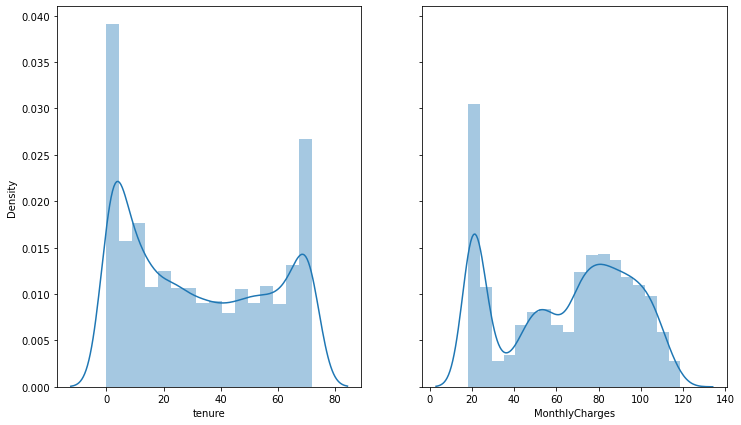

In [100]:
figs, position = plt.subplots(1,2, figsize = (12,7), sharey = True)

sns.distplot(df["tenure"], ax=position[0])
sns.distplot(df["MonthlyCharges"], ax=position[1])


In [101]:
df[['tenure', 'MonthlyCharges', 'Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [102]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103



After the EDA has been performed, I concluded that I should be dropping the following attributes and they are as follows:
 1. CustomerID
 2. Gender
 3. PhoneService
 4. Contract
 5. TotalCharges


In [103]:
df.drop(['customerID', 'gender', 'PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [104]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


# Data Pre-Processing

Lets check unique values in every column.

In [105]:
cols = df.columns

for chk in cols:
    print(chk)
    print(df[chk].unique())

SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn
[0 1]


As we could see there are categorical values for every attributes except the "tenure" and "MonthlyCharges" attribute.

So now let's try to encode so that our model could include in the tuning method.

In [106]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cat_attributes = ['SeniorCitizen','Partner','Dependents','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','PaperlessBilling','PaymentMethod']

X = pd.get_dummies(df, columns=cat_attributes, drop_first = True)

Now, let's scale the continuous attributes i.e., 'tenure' and 'MonthlyCharges'

In [107]:
sc = MinMaxScaler ()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

In [108]:
X['tenure'] = a
X['MonthlyCharges'] = b

In [109]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [110]:
X.shape

(7043, 26)

Let's resample the churn attribute

In [111]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [112]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace = True, 
                               random_state = 42)

print(len(X_yes_upsampled))

5174


Text(0.5, 1.0, 'Class Distribution after Reampling')

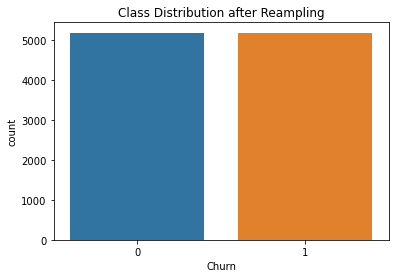

In [113]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

sns.countplot('Churn', data = X_upsampled).set_title('Class Distribution after Reampling')


### Now, let's try to fit our data in different models.

In [114]:
from sklearn.model_selection import train_test_split

X= X_upsampled.drop(['Churn'], axis=1)
y = X_upsampled['Churn']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42)

##### Let's try to put in a Ridge Classifier

In [116]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

RidgeClassifier()

In [117]:
pred = ridge.predict(X_train)
accuracy_score(y_train, pred)


0.7574293307562213

In [118]:
pred_test = ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7608695652173914

##### The model is showing about 76% of accuracy so I would try and explore the random forest model

In [119]:
from sklearn.ensemble import RandomForestClassifier

rforestobj = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rforestobj.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [120]:
pred = rforestobj.predict(X_test)
accuracy_score(y_test, pred)

0.8410628019323672

However, we got the accuracy to be 8% more in Random Forest Classifier.
Further, I will be trying to make it more accurate.